# Detección de objetos y familia de algoritmos YOLO

## 1. Descripción del problema

Antes de definir el problema se harán algunas definiciones:

- **Imagen**: matriz de $W$ columnas $\times$ por $H$ filas donde cada elemento es un píxel de color representado por tres componentes de intensidad en los canales $R,G,B$, donde 0 es la intensidad mínima y 1.0 es la intensidad máxima.
Nota: existen otras representaciones, pero para este trabajo sólo se utilizará esta.

- **Clasificación de imágenes**: es la tarea de asociar a una imagen una clase o categoría de un conjunto predefinido.

$$
x \in I^{W \times H \times 3}
$$

$$
c \in {C_0,C_1,...,C_{n-1}}
$$

La clasificación consiste en contar con un modelo que dada una imagen, devuelva la probabilidad pertenezca a una de las categorías.

$$
f(x) = [P_{c_0},P_{c_1},...,P_{c_{n-1}}], \sum_0^{n-1} {P_{c_i}} = 1
$$

- **Localización de objetos en imágenes**: es la tarea de indicar en una imagen la presencia de un objeto de interés (representado en una región de esa imagen), devolviendo la región que contiene se objeto. La región puede ser aproximada a una forma geométrica más simple, como por ejemplo un rectángulo o *bounding box*, en cuyo caso se indicará el centro $x_c,y_c$ y el ancho y alto en píxeles $(w,h)$.

- **Localización y clasificación de objetos**: es la tarea de hallar objetos en una imagen e indicar la región en que se encuentran y la probabilidad de que pertenezcan a una clase conocida.

## 2. Métricas de evaluación

*AP* y *mAP* (por sus siglas en inglés *Average Precision* y *mean Average Precision*) son dos de las métricas más populares para evaluar el desempeño de un detector de objetos, y han sido utilizadas en competiciones como COCO, PASCAL y VOC.
De estas métricas es posible derivar otras como *AP50*, *AP75* y *AP[.5:.5:.95]*, por citar algunas.

### Definiciones

- True Positive (TP): una detección válida.
- False Positive (FP): una detección inválida.
- False Negative (FN): blanco no detectado.
- True Negative (TN): esta métrica no se utiliza en detección de objetos, porque hay infinitas instancias que podrían no ser detectadas como un objeto.

Intersection over Union

$$
IoU = \frac{area(gt \cap pd}{area(gt \cup pd)}
$$

Se definen:

- TP como una detección para la cual $IoU > \alpha$.
- FP como una detección para la cual $IoU < \alpha$.
- FN es un blanco no detectado por el modelo.

### Matriz de confusión

FIXME

### Precision y recall

Dado que TN no existe en detección de objetos, se deben evitar métricas que utilicen este componente de la matriz de confusión como TNR (*True Negative Rate*), NPC (*Negative Predictive Value*) y ROC (*Receiver Operating Characteristic*). En cambio, para la evaluación de modelos de detección de objetos basada en Precision(P) y Recall(R) se definen:

$$
P = \frac{TP}{TP+FP}
$$

$$
R = \frac{TP}{TP+FN}
$$

*Precision* es la habilidad que tenga el clasificador de identificar blancos relevantes unicamente. Es la proporción de detecciones correctas del total de existentes.

## 3. Familia de algoritmos YOLO

### 3.1 YOLO

##### Aproximación clásica a la detección de objetos

- **Sliding windows**: realizar un barrido por la imagen en ventanas de un tamaño menor y aplicar un clasificador a una de ellas.
- **Region proposal**: optimización del metodo anterior. Utilizar un algoritmo con bajos requerimientos de cómputo para proponer regiones candidatas que puedan tener objetos de interés (por ejemplo HoG) a las cuales aplicar el clasificador.

##### Convolutional Implementation of Sliding Windows

Ver: [Sermanet et al., 2014, OverFeat: Integrated recognition, localization and detection using convolutional networks.](https://arxiv.org/pdf/1312.6229.pdf)

##### Bounding Box Predictions

In [ ]:
#FIXME

##### Non-max Suppression

In [ ]:
#FIXME

##### Anchor Boxes

In [ ]:
#FIXME

### 3.2 YOLOv2

In [8]:
#FIXME

### 3.3 YOLOv3

In [ ]:
#FIXME

### 3.4 YOLOv4

In [ ]:
#FIXME

- Backbone
    - Bag of freebies: métodos que incrementan el tiempo de entrenamiento pero no el de inferencia.
        - Data augmentation:
            - Photometric Distortion
            - Geometric Distortion
            - MixUp
            - CutMix 
            - GANs.
        - Disminución de sesgo (bias):
            - Focal loss
            - Label smoothing
            - IoU loss
    - Bag of specials: métodos que disminuyen ligeramente el costo de inferencia pero tienen una mejora significativa en el *accuracy* de la detección:
        - Mish activation
    - CSPDarknet53 (CSP = Cross Stage Partial)
    
ver: https://becominghuman.ai/explaining-yolov4-a-one-stage-detector-cdac0826cbd7

### 3.5 Implementación Darknet

In [7]:
#FIXME

## 4. Modelos entrenados y reporte de desempeño

- Se ensayan modelos con distintas configuraciones y HPS, así como distintas preparaciones de datos de entrada.
- Todos los modelos se entrenan sobre un dataset que se particiona en TRAIN, VALIDATION y TEST con una proporción (70,20,10) (ajustar dependiendo de disponibilidad de datos).
- La partición de TEST se deja intacta y no es utilizada hasta que el modelo ha finalizado su entrenamiento. La evaluación para obtener las métricas de desempeño se hace sobre esta partición.
- La partición de TRAIN puede ampliarse mediante técnicas de aumentado. La partición VALIDATION se utiliza para monitorear la evolución durante el entrenamiento y para calibración de hiperparámetros.


### 4.1 Lectura de resultados

In [66]:
WORKSPACE_PATH="/notebooks"
WORKSPACE_DATA_PATH=WORKSPACE_PATH+"/data"
WORKSPACE_EVAL_PATH=WORKSPACE_DATA_PATH+"/evaluation/"
WORKSPACE_EVAL_TESTDATA_PATH = WORKSPACE_EVAL_PATH+"/test_data"
WORKSPACE_EVAL_RESULTS_PATH = WORKSPACE_PATH+"/results"
WORKSPACE_EVAL_TESTDATA_PATH = WORKSPACE_EVAL_PATH+"/test_data"
WORKSPACE_EVAL_RESULTS_PATH = WORKSPACE_EVAL_PATH+"/results"

In [67]:
!ls {WORKSPACE_EVAL_TESTDATA_PATH}

test-img.jpg  test-img.txt


#### 4.1.1 Ejemplo

In [173]:
MODEL_NAME = "kaggle_fisheries"
MODEL_RESULTS_PATH=WORKSPACE_EVAL_RESULTS_PATH+"/"+MODEL_NAME
!ls {MODEL_RESULTS_PATH}

dol0-pred.jpg  dol0-pred.txt  test-img-pred.jpg  test-img-pred.txt


In [174]:
MODEL_CLASSES_TXT = WORKSPACE_DATA_PATH+"/models/"+MODEL_NAME+"/classes.txt"
!cat {MODEL_CLASSES_TXT}

ALB
BET
DOL
LAG
SHARK
YFT
OTHER

In [175]:
with open(MODEL_CLASSES_TXT,"rt") as fp:
    class_names = [x.rstrip("\n") for x in fp.readlines()]
class_names    

['ALB', 'BET', 'DOL', 'LAG', 'SHARK', 'YFT', 'OTHER']

In [176]:
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [177]:
def load_detection_results(filename,col_format="single",norm = False):
    """ Carga los BB de una detección.
    col_format: 
        - single si las detecciones son para una única imagen
        - batch si las detecciones son para múltiples imagenes  
    norm: Normalizar coordenadas de bounding box.
    """
    col_names = ["img"] if col_format!='single' else []    
    col_names += ["class","xt","yt","xb","yb","score"]
    df = pd.read_csv(filename,sep=" ",header=None, names = col_names )
        
    if norm:
        img_filename = os.path.splitext(filename)[0]+".jpg"
        image = Image.open(img_filename)
        
        w, h = image.size
        df.xt = df.xt * w
        df.yt = df.yt * h
        df.xb = df.xt + df.xb*w
        df.yb = df.yt + df.yb*h
    else:
        # (xt,yt,w,h) -> (xt,yt,xb,yb)
        df.xb = df.xt + df.xb
        df.yb = df.yt + df.yb
        
    return df

df_pred = load_detection_results(MODEL_RESULTS_PATH+"/test-img-pred.txt")
df_pred

,class,xt,yt,xb,yb,score
0,0,487.0,144.0,1004.0,275.0,0.770
1,0,593.0,126.0,830.0,293.0,0.641


In [178]:
def load_detection_gt(filename,col_format="single",denorm=True):
    """ Carga los BB de una detección.
    col_format: 
        - single si las detecciones son para una única imagen
        - batch si las detecciones son para múltiples imagenes    
    denorm:
        denormalizar (para formato YOLO). Formato de entrada (xc,yc,w,h)
    """
    col_names = ["img"] if col_format!='single' else []    
    col_names += ["class","xt","yt","xb","yb"]
    df = pd.read_csv(filename,sep=" ",header=None, names = col_names )
    
    if denorm:
        img_filename = os.path.splitext(filename)[0]+".jpg"
        image = Image.open(img_filename)
        w, h = image.size
        
        # Bounding box width
        bb_w = df.xb * w
        bb_h = df.yb * h
        
        # xc,yc,bb_w,bb_h -> (xt,yt,xb,yb)
        df.xt = df.xt*w - bb_w/2
        df.yt = df.yt*h - bb_h/2
        df.xb = df.xt + bb_w
        df.yb = df.yt + bb_h

    return df

df_gt = load_detection_gt(WORKSPACE_EVAL_TESTDATA_PATH+"/test-img.txt")
df_gt

,class,xt,yt,xb,yb
0,0,528.00064,142.99992,921.00032,298.00008


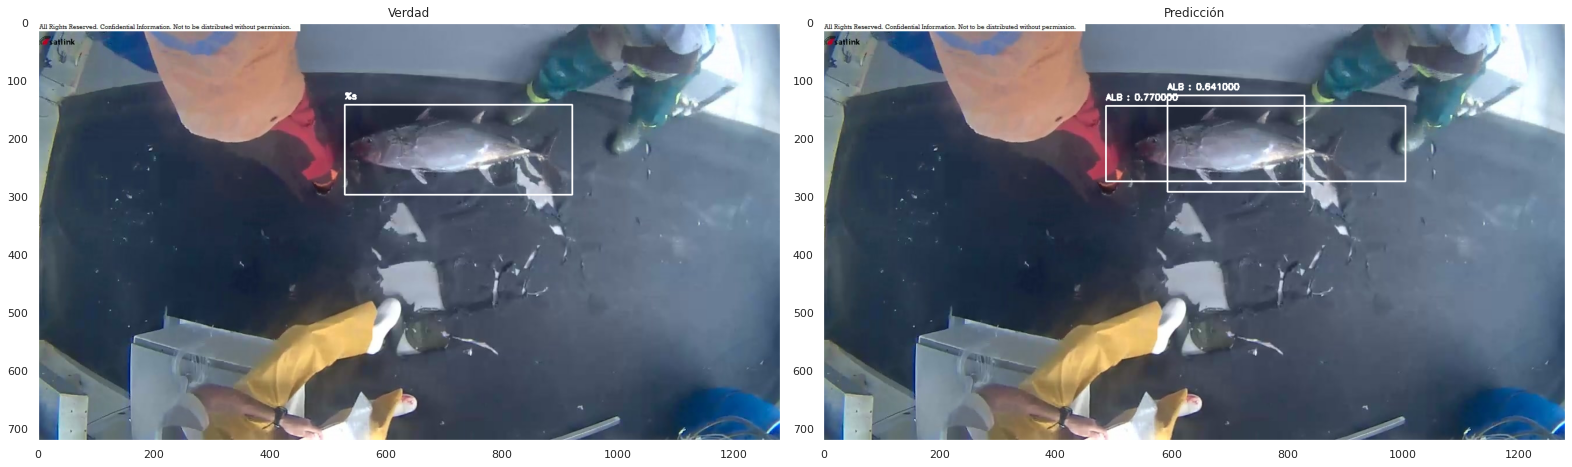

In [179]:
img_filename = WORKSPACE_EVAL_TESTDATA_PATH+"/test-img.jpg"

def draw_bounding_boxes(img,df,class_names):
    for row in df.iterrows():
        #color = self.COLORS[int(classid) % len(self.COLORS)]
        color = (255,255,255)
        class_idx = row[1]['class'].astype(int)    
        if 'score' in row[1]:
            label = "%s : %f" % (class_names[class_idx], row[1].score)
        else:
            label = "%s"
            
        w = img.shape[1]
        h = img.shape[0]
            
        xt = row[1].xt.astype(int)
        yt = row[1].yt.astype(int)
        
        bb_w = row[1].xb.astype(int)-xt
        bb_h = row[1].yb.astype(int)-yt
        
        
        cv2.rectangle(img, (xt,yt,bb_w,bb_h), color, 2)
        cv2.putText(img, label, (xt, yt - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

fig,axes = plt.subplots(1,2,figsize=(22,8))        
img_gt = np.array(Image.open(img_filename))                                              
img_pred = img_gt.copy()
                                              
draw_bounding_boxes(img_gt,df_gt,class_names)
draw_bounding_boxes(img_pred,df_pred,class_names)                                              
                        
axes[0].set_title("Verdad")
axes[0].imshow(img_gt)
axes[0].grid(False)
axes[1].set_title("Predicción")
axes[1].imshow(img_pred)
axes[1].grid(False)
fig.tight_layout()

In [189]:
%%capture
!pip3 install object_detection_metrics

In [200]:
from podm.podm import BoundingBox, get_pascal_voc_metrics

# Ground truth
bb_gt = []
for row in df_gt.iterrows():
    image_name = "test_img"
    class_idx = row[1]['class'].astype(int)    
    label = class_names[class_idx]    
    xtl = row[1].xt
    ytl = row[1].yt
    xbr = row[1].xb
    ybr = row[1].yb
    bb_gt.append(BoundingBox(image_name, label, xtl, ytl, xbr, ybr, score=None))
    
    bb_pd = BoundingBox(image_name, label, xtl-10.3, ytl-10.3, xbr, ybr, score)
    
# Prediction
bb_pd = []
for row in df_pred.iterrows():
    image_name = "test_img"
    class_idx = row[1]['class'].astype(int)    
    label = class_names[class_idx]    
    xtl = row[1].xt
    ytl = row[1].yt
    xbr = row[1].xb
    ybr = row[1].yb
    score = row[1].score    
    bb_pd.append(BoundingBox(image_name, label, xtl, ytl, xbr, ybr, score=score))
    
alpha = .6

results = get_pascal_voc_metrics(bb_pd,bb_gt)    

In [201]:
results['ALB'].get_mAP(results)

0.5

In [205]:
from podm.visualize import plot_precision_recall_curve_all

plot_precision_recall_curve_all(results,dest_dir=".")

TypeError: unsupported operand type(s) for /: 'str' and 'str'

<hr/>

In [ ]:
from podm import visualize
help(visualize)

Help on module podm.visualize in podm:

NAME
    podm.visualize

FUNCTIONS
    plot_precision_recall_curve(result: podm.podm.MetricPerClass, dest, method: podm.podm.MethodAveragePrecision = <MethodAveragePrecision.AllPointsInterpolation: 1>, show_ap: bool = False, show_interpolated_precision: bool = False)
        PlotPrecisionRecallCurve
        Plot the Precision x Recall curve for a given class.
        Args:
            result: metric per class
            dest: the plot will be saved as an image in this path
            method: method for interpolation
            show_ap: if True, the average precision value will be shown in the title of
                the graph (default = False);
            show_interpolated_precision (optional): if True, it will show in the plot the interpolated
                precision (default = False);
    
    plot_precision_recall_curve_all(results: Dict[str, podm.podm.MetricPerClass], dest_dir, method: podm.podm.MethodAveragePrecision = <MethodAverageP

In [180]:


image_name = "test_img"
label = "class_1"
w = 30.0
h = 20.0
xtl = 10.0
ytl = 10.0
xbr = xtl+w
ybr = xtl+h
score = 1.0

bb_pd = BoundingBox(image_name, label, xtl-10.3, ytl-10.3, xbr, ybr, score)
bb_gt = BoundingBox(image_name, label, xtl, ytl, xbr, ybr, score=None)
alpha = .5
get_pascal_voc_metrics(bb_pd,bb_gt)

NameError: name 'BoundingBox' is not defined

1.0

### 4.2 Modelos entrenados

Para cada modelo entrenado se detalla:

- Descripción.
- Arquitectura, parámetros.
- Datos de entrada y sus transformaciones aplicadas.
- Parámetros de entrenamiento.
- Ambiente de entrenamiento.
- Información adicional del entrenamiento: curvas, tiempo, 
- Resultado de evaluación final
- Archivos

 ### 4.2.1 YOLOv4 (Darknet)

 #### Arquitectura

 #### Datos de entrada

 #### Parámetros de entrenamiento

 #### Ambiente de entrenamiento

 #### Información del entrenamiento

 #### Evaluación

 #### Archivos

## Bibliografía y referencias

- https://jonathan-hui.medium.com/map-mean-average-precision-for-object-detection-45c121a31173